=== Slika 3 ===


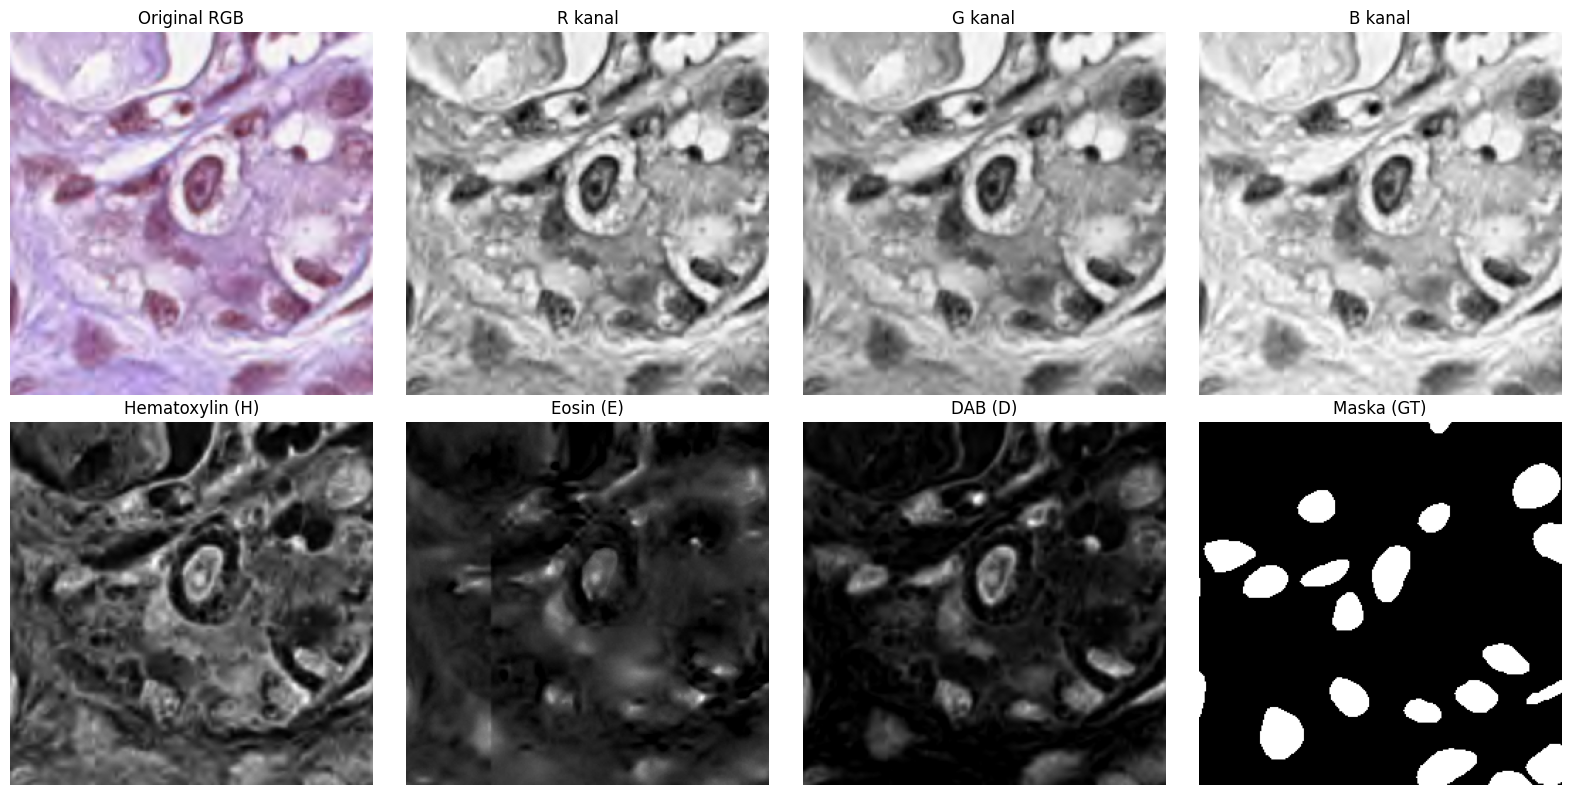

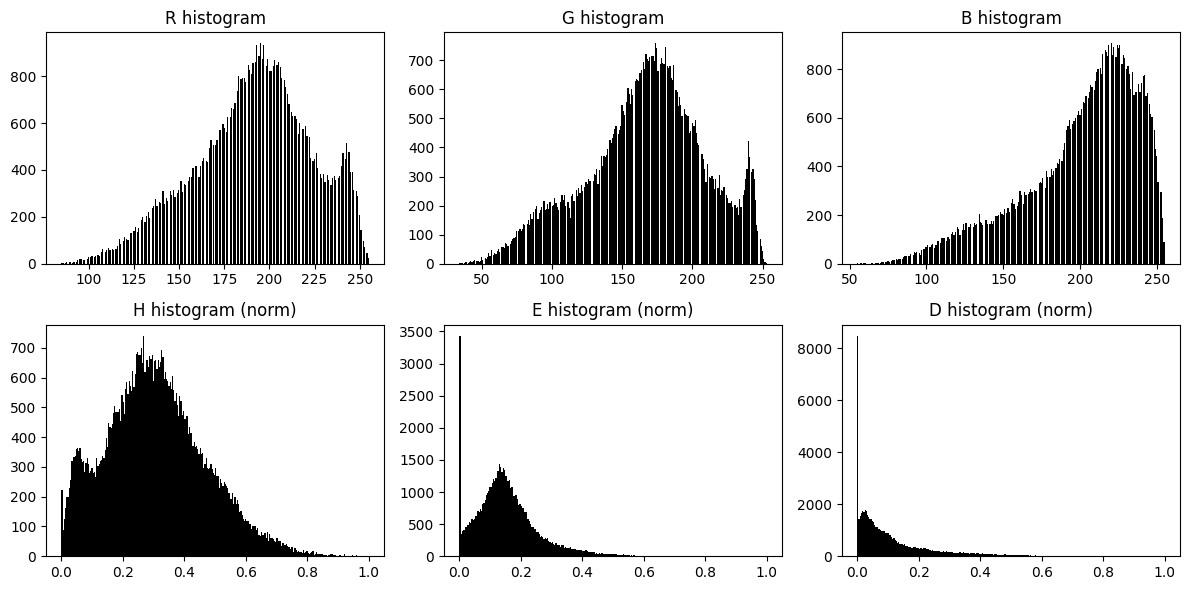

=== Slika 4 ===


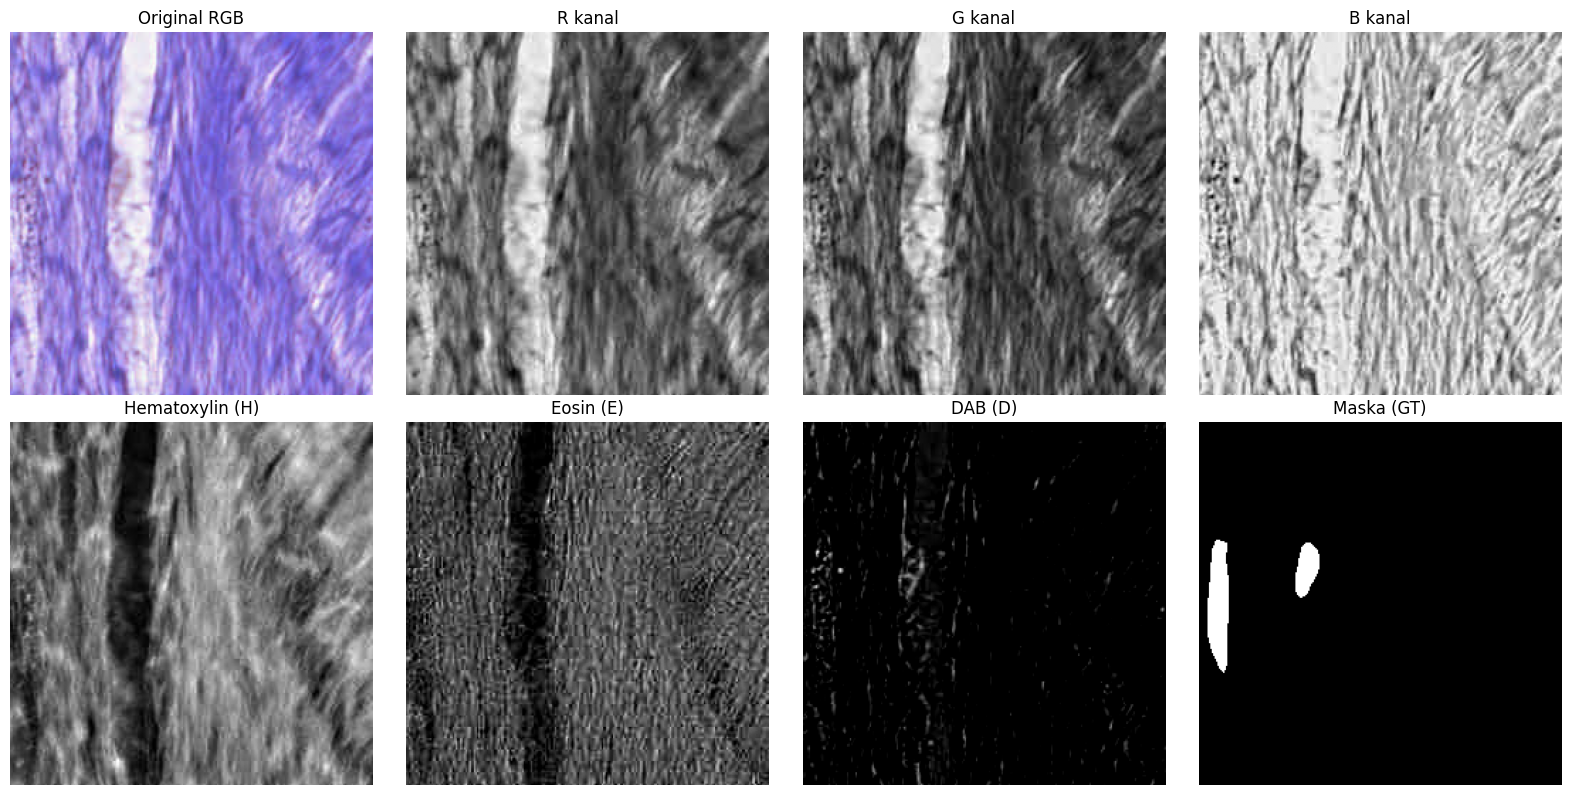

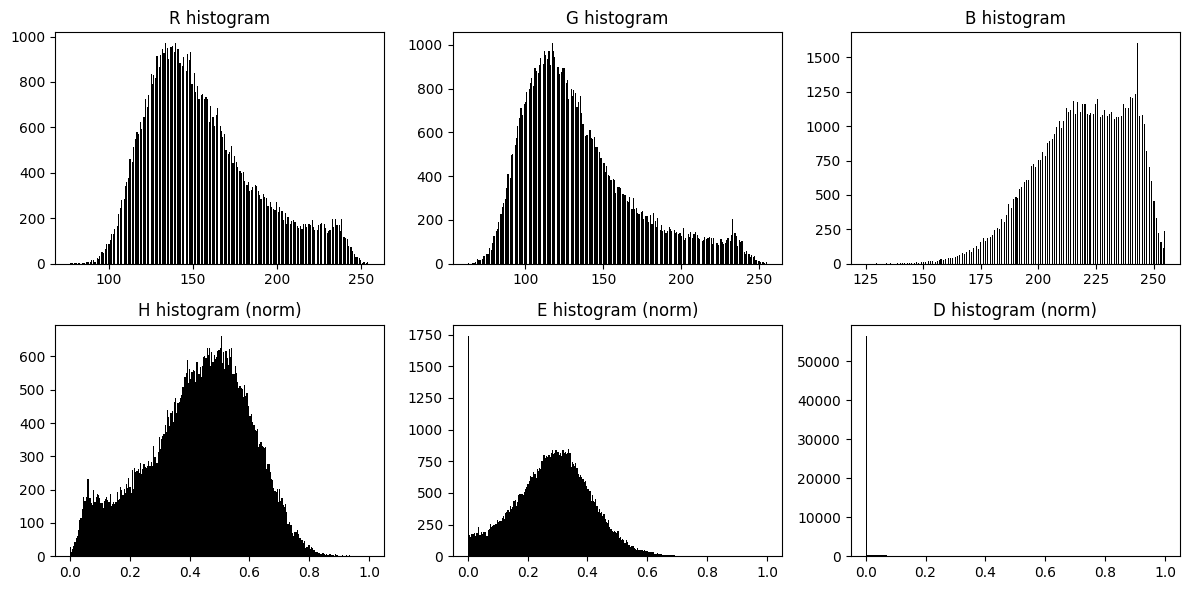

=== Slika 5 ===


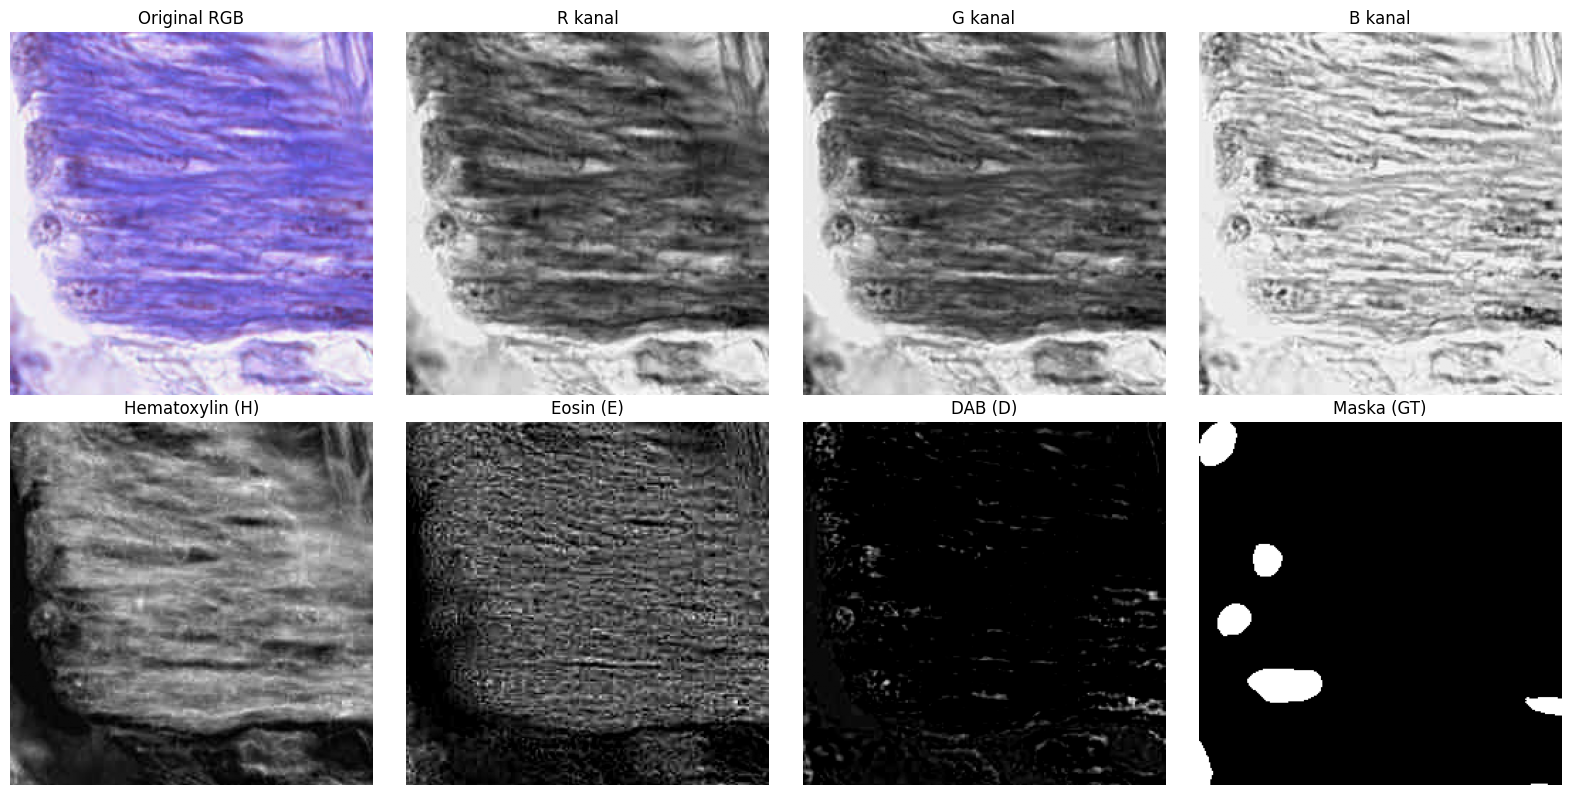

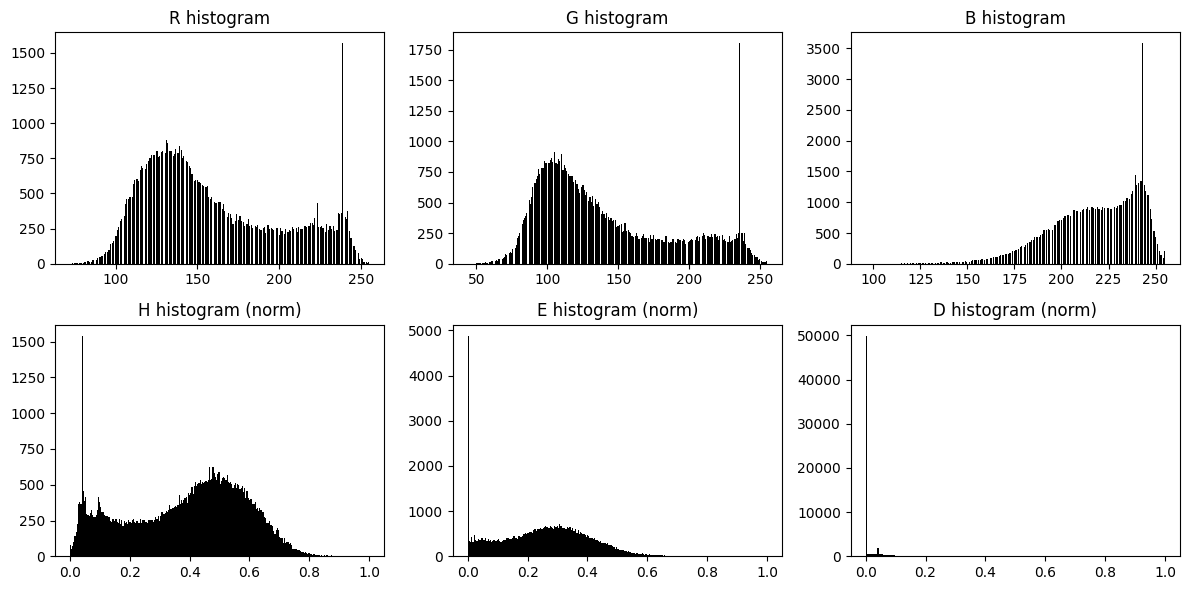

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
image_dir = r"C:\Users\User\Desktop\abs\projekat\dataset\images" 
mask_dir = r"C:\Users\User\Desktop\abs\projekat\dataset\masks"
image_files = sorted(os.listdir(image_dir))
mask_files = sorted(os.listdir(mask_dir))



# === Helper funkcija za normalizaciju ===
def normalize(x):
    return (x - x.min()) / (x.max() - x.min())

# === Prikaz jedne slike ===
def show_rgb_hed_gray(idx):
    img_path = os.path.join(image_dir, image_files[idx])
    mask_path = os.path.join(mask_dir, mask_files[idx])
    
    img = io.imread(img_path)
    mask = io.imread(mask_path)

    # RGB kanali
    R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]

    # HED dekonvolucija
    hed = color.separate_stains(img, color.hed_from_rgb)
    H, E, D = hed[:,:,0], hed[:,:,1], hed[:,:,2]

    Hn, En, Dn = normalize(H), normalize(E), normalize(D)

    # === Figure sa kanalima ===
    fig, axes = plt.subplots(2, 4, figsize=(16,8))
    axes[0,0].imshow(img, cmap="gray"); axes[0,0].set_title("Original RGB"); axes[0,0].axis("off")
    axes[0,1].imshow(R, cmap="gray"); axes[0,1].set_title("R kanal"); axes[0,1].axis("off")
    axes[0,2].imshow(G, cmap="gray"); axes[0,2].set_title("G kanal"); axes[0,2].axis("off")
    axes[0,3].imshow(B, cmap="gray"); axes[0,3].set_title("B kanal"); axes[0,3].axis("off")

    axes[1,0].imshow(Hn, cmap="gray"); axes[1,0].set_title("Hematoxylin (H)"); axes[1,0].axis("off")
    axes[1,1].imshow(En, cmap="gray"); axes[1,1].set_title("Eosin (E)"); axes[1,1].axis("off")
    axes[1,2].imshow(Dn, cmap="gray"); axes[1,2].set_title("DAB (D)"); axes[1,2].axis("off")
    axes[1,3].imshow(mask, cmap="gray"); axes[1,3].set_title("Maska (GT)"); axes[1,3].axis("off")
    
    plt.tight_layout()
    plt.show()

    # === Histogrami ===
    fig, axes = plt.subplots(2, 3, figsize=(12,6))
    axes[0,0].hist(R.ravel(), bins=256, color='black'); axes[0,0].set_title("R histogram")
    axes[0,1].hist(G.ravel(), bins=256, color='black'); axes[0,1].set_title("G histogram")
    axes[0,2].hist(B.ravel(), bins=256, color='black'); axes[0,2].set_title("B histogram")
    axes[1,0].hist(Hn.ravel(), bins=256, color='black'); axes[1,0].set_title("H histogram (norm)")
    axes[1,1].hist(En.ravel(), bins=256, color='black'); axes[1,1].set_title("E histogram (norm)")
    axes[1,2].hist(Dn.ravel(), bins=256, color='black'); axes[1,2].set_title("D histogram (norm)")

    plt.tight_layout()
    plt.show()


# === Pozovi za 3 slike ===
for idx in [3, 4, 5]:
    print(f"=== Slika {idx} ===")
    show_rgb_hed_gray(idx)


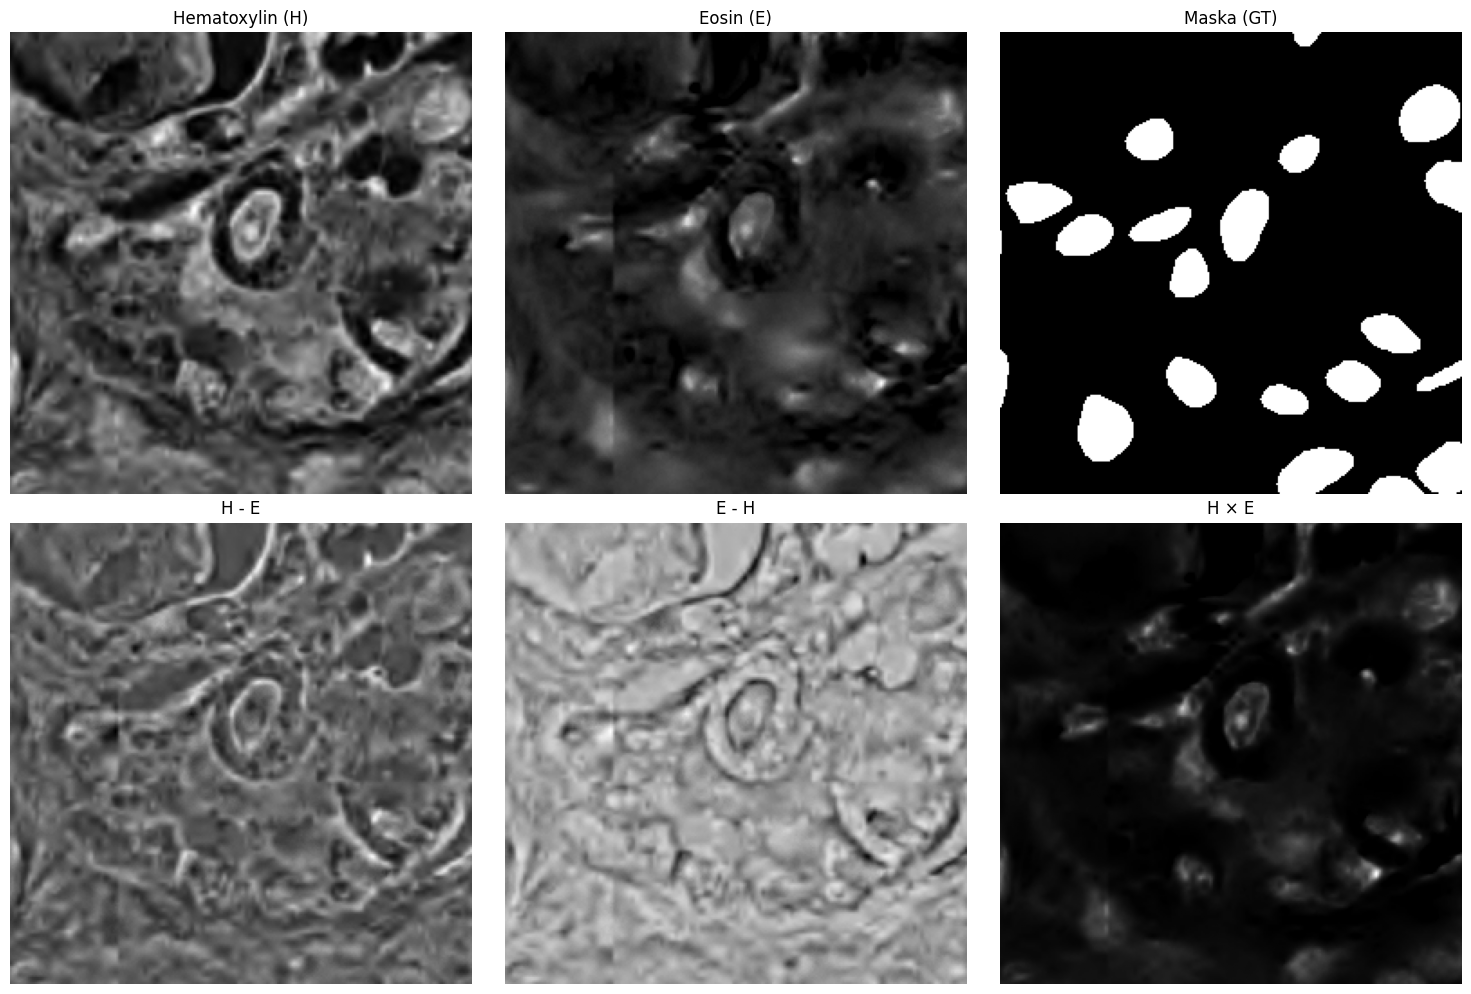

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

def normalize(x):
    return (x - x.min()) / (x.max() - x.min())

def show_h_e_ops(idx):
    img_path = os.path.join(image_dir, image_files[idx])
    mask_path = os.path.join(mask_dir, mask_files[idx])
    
    img = io.imread(img_path)
    mask = io.imread(mask_path)

    # HED dekonvolucija
    hed = color.separate_stains(img, color.hed_from_rgb)
    H, E = hed[:,:,0], hed[:,:,1]

    Hn, En = normalize(H), normalize(E)

    # Operacije
    H_minus_E = Hn - En
    E_minus_H = En - Hn
    H_times_E = Hn * En

    # === Prikaz ===
    fig, axes = plt.subplots(2, 3, figsize=(15,10))

    axes[0,0].imshow(Hn, cmap="gray")
    axes[0,0].set_title("Hematoxylin (H)"); axes[0,0].axis("off")

    axes[0,1].imshow(En, cmap="gray")
    axes[0,1].set_title("Eosin (E)"); axes[0,1].axis("off")

    axes[0,2].imshow(mask, cmap="gray")
    axes[0,2].set_title("Maska (GT)"); axes[0,2].axis("off")

    axes[1,0].imshow(H_minus_E, cmap="gray")
    axes[1,0].set_title("H - E"); axes[1,0].axis("off")

    axes[1,1].imshow(E_minus_H, cmap="gray")
    axes[1,1].set_title("E - H"); axes[1,1].axis("off")

    axes[1,2].imshow(H_times_E, cmap="gray")
    axes[1,2].set_title("H × E"); axes[1,2].axis("off")

    plt.tight_layout()
    plt.show()

# Primer na jednoj slici
show_h_e_ops(3)


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
import staintools

def normalize_uint8(img):
    if img.dtype != "uint8":
        img = (255 * (img / img.max())).astype("uint8")
    return img

# === Učitaj source i target ===
idx_source = 1   # promeni po potrebi
idx_target = 0   # target slika (može biti neka "lepša" iz dataset-a)

source_path = os.path.join(image_dir, image_files[idx_source])
target_path = os.path.join(image_dir, image_files[idx_target])

source_img = io.imread(source_path)
target_img = io.imread(target_path)

# Konverzija u uint8
source_img = normalize_uint8(source_img)
target_img = normalize_uint8(target_img)

# === Normalizacija (Macenko) ===
normalizer = staintools.StainNormalizer(method='macenko')
normalizer.fit(target_img)
normalized_img = normalizer.transform(source_img)

# === Stain deconvolution pre i posle ===
hed_source = color.separate_stains(source_img, color.hed_from_rgb)
hed_norm = color.separate_stains(normalized_img, color.hed_from_rgb)

H_source = hed_source[:,:,0]
H_normed = hed_norm[:,:,0]

# Normalizacija kanala na [0,1] radi prikaza
def scale01(x):
    return (x - x.min()) / (x.max() - x.min())

H_source_n = scale01(H_source)
H_normed_n = scale01(H_normed)

# === Prikaz ===
fig, axes = plt.subplots(2, 3, figsize=(15,10))

axes[0,0].imshow(source_img)
axes[0,0].set_title("Original slika")
axes[0,0].axis("off")

axes[0,1].imshow(target_img)
axes[0,1].set_title("Target slika (referentna)")
axes[0,1].axis("off")

axes[0,2].imshow(normalized_img)
axes[0,2].set_title("Normalizovana (Macenko)")
axes[0,2].axis("off")

axes[1,0].imshow(H_source_n, cmap="gray")
axes[1,0].set_title("H kanal - pre normalizacije")
axes[1,0].axis("off")

axes[1,1].imshow(H_normed_n, cmap="gray")
axes[1,1].set_title("H kanal - posle normalizacije")
axes[1,1].axis("off")

# razlika
axes[1,2].imshow(np.abs(H_source_n - H_normed_n), cmap="gray")
axes[1,2].set_title("Razlika H kanala")
axes[1,2].axis("off")

plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'spams'